# Matplotlib and Seaborn

## Introduction

**Matplotlib** is a 2D and 3D graphics library for plotting scientific figures. It is very easy to get started,, it supports Latex formatted text, you can easily control every element in a figure such as figure size and resolution, there are many output formats and it also includes a GUI for exploring the figures.

A list of plots that Matplotlib supports can be found at [Matplotlib plots](https://matplotlib.org/3.2.0/gallery/index.html)

**Seaborn** is a library based on matplotlib. It provides a high-level interface to create different informative statistical graphics.  It is integrated closely with Pandas so it is a good choice when your data is available in DataFrames.

A list of plots that Seaborn supports can be found at [Seaborn plots](https://seaborn.pydata.org/examples/index.html)

**Table of Contents:**

* [Matplotlib basics](#Matplotlib-basics)
  * [Importing Matplotlib](#Importing-Matplotlib)
  * [Creating Axes](#Creating-Axes)
  * [Subplots](#Subplots)
  * [Figure size, DPI and aspect ratio](#Figure-size,-DPI,-aspect-ratio)
  * [Showing figures](#Showing-figures)
  * [Saving figures](#Saving-figures)
  * [Legends](#Legends)
  * [Text in figures](#Text-in-figures)
  * [Line and marker styles](#Line-and-marker-style)
  * [Twin axes](#Twin-axes)
  * [More plot styles](#More-plot-styles)
* [Seaborn basics](#Plotting-data-Seaborn)

## Matplotlib basics

First of all, take a look on this nice figure taken from [Matplotlib anatomy](https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py). The figure shows the name of many Matplotlib components available in one figure:

![matplotlib anatomy](https://matplotlib.org/_images/anatomy.png)

### Importing Matplotlib

There are two ways of importing Matplotlib. 

* One of these ways allows to use the **MatLab-like API**, i.e., it is compatible with MatLab's plotting functions and it is easier to start with if you are already familiar with MatLab:

In [1]:
from pylab import *

Let's see one example:

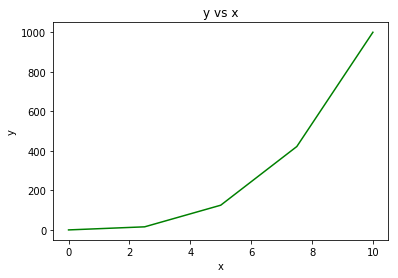

In [2]:
import numpy as np

x = np.linspace(0,10,5)
y = x ** 3

figure()
plot(x,y,'g')
xlabel('x'); ylabel('y'); title('y vs x')
show()

* The other way correspond to the **object-oriented API**. This allows to have objects where we can apply actions on, like functions. This way is better when we have more than one figure or if the figure contains several subplots. To import it we use (note that `plt` is the most common abbreviation, but it can be changed to any name):

In [3]:
import matplotlib.pyplot as plt

## Creating Axes

Let's start with the same figure as before:

Text(0.5,1,'y vs x')

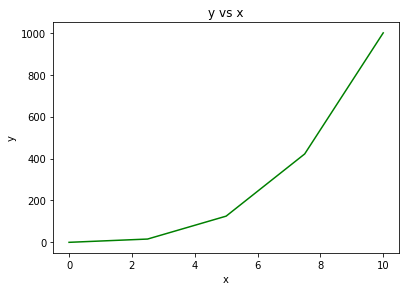

In [25]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'g')  #What to plot, 'g' indicates green color

axes.set_xlabel('x') # x axis label
axes.set_ylabel('y') # y axis label
axes.set_title('y vs x') # title 

In the previous code, instead of creating a global figure instance, there is a reference stored for the new figure instance created in the `fig` variable. From this variable a new axis instance is created (`axes`) using the `add_axes` method available in the `figure` class.

Now we could play a bit more with the figure, as we have full control on the axes:

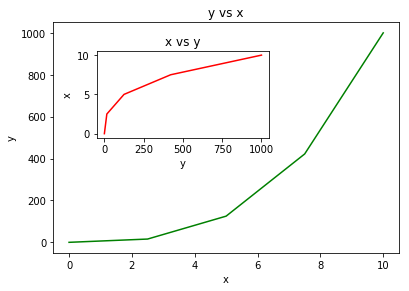

In [5]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'g')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('y vs x')

# insert
axes2.plot(y, x, 'r')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('x vs y');

### Subplots

Now, if there is no need of being explicit about the location of our plot axes, the easiest is to use `subplots`:

Text(0.5,1,'y vs x')

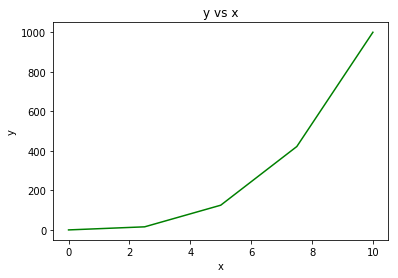

In [19]:
fig, axes = plt.subplots()

axes.plot(x,y,'g')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('y vs x')

Text(0,0.5,'x')

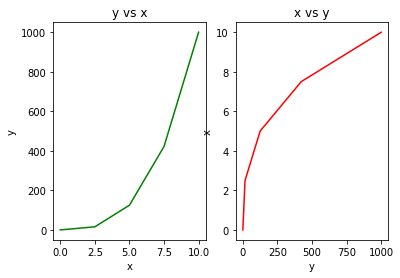

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x,y,'g')
axes[1].plot(y,x,'r')
axes[0].set_title('y vs x')
axes[1].set_title('x vs y')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].set_xlabel('y')
axes[1].set_ylabel('x')

There is a small problem with axes and labels being too close. We can improve that with the `fig.tight_layout` method that avoid the overlapping of content:

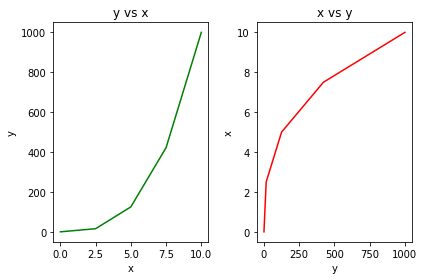

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x,y,'g')
axes[1].plot(y,x,'r')
axes[0].set_title('y vs x')
axes[1].set_title('x vs y')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].set_xlabel('y')
axes[1].set_ylabel('x')

fig.tight_layout()

We can also play with the number of subplots and insets. This can be done with `subplots`, `subplot2grid` and `gridspec`:

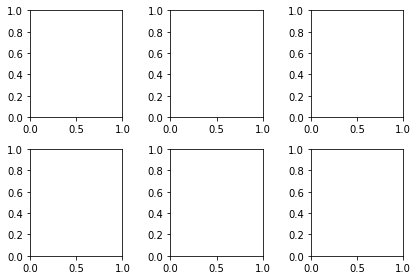

In [63]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

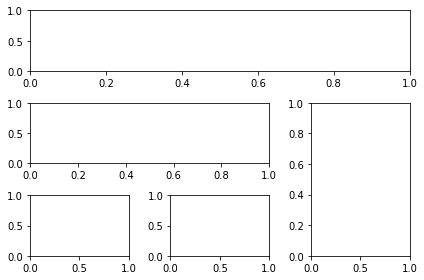

In [64]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

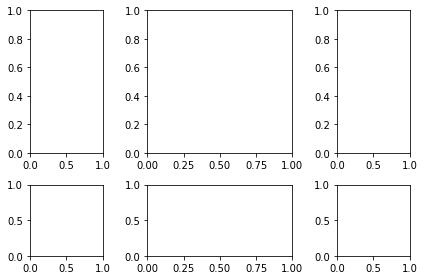

In [66]:
import matplotlib.gridspec as gridspec

fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

### Figure size, DPI, aspect ratio

In Matplotlib we can specify the figure size, DPI and aspect ratio once the Figure object is created. The keywords for this are `figsize` and `dpi`. `figsize` is a tuple containing width and height in inches, while `dpi` contains the dots (pixels) per inch. Let's try a 800x400 pixel, 100 dots per inch figure:

In [20]:
fig = plt.figure(figsize=(8,4), dpi=100)

We can also do the same using subplots:

Text(0.5,1,'y vs x')

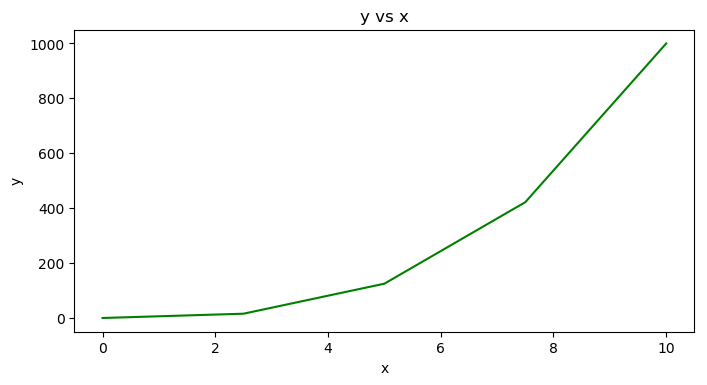

In [22]:
fig, axes = plt.subplots(figsize=(8,4), dpi=100)

axes.plot(x,y,'g')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('y vs x')

### Showing figures

If you are not running Matplotlib in a jupyter notebook you need to specify `figure.show()` to show a figure or `plt.show()` to show all figures.

### Saving figures

To save a figure to a file we use the `savefig` method of the `figure` class.:

In [23]:
fig.savefig('images/figure.png')

You can also specify the DPI and choose other formats like jpg, eps, svg, pgf and pdf. 

In [24]:
fig.savefig('images/figure2.png', dpi=200)

### Legends

To add legends to the plot we use the `legend` method, and these can be added in two ways:

* By passing the legend texts as a list/tuple


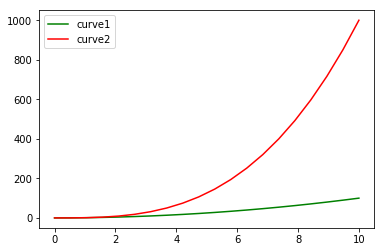

In [29]:
x = np.linspace(0,10,20)
y = x**2
z = x**3

fig, ax = plt.subplots()

ax.plot(x,y,'g')
ax.plot(x,z,'r')
ax.legend(['curve1','curve2'])

The previous method is not so recommendable as curves can be easily mistaken if others are added.

* By using the `label` keyword argument and then using `legend` without arguments.

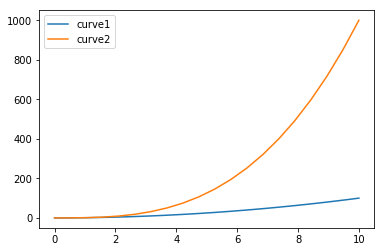

In [31]:
fig, ax = plt.subplots()
ax.plot(x,y,label='curve1')
ax.plot(x,z,label='curve2')
ax.legend()

If new curves are added, then the last method is better as legends will be updated automatically. A useful argument for this method is `loc`, which allows to specify the location of the legend. This is important as sometimes you face to the problem that the legend is overlapping an important part of your figure. The argument is simply `loc=x`, where x can be

* 0 - matplotlib decides the best location
* 1 - upper right corner
* 2 - upper left corner
* 3 - lower left corner
* 4 - lower right corner

Check [Matplotlib legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) for more details, as many more options are available.

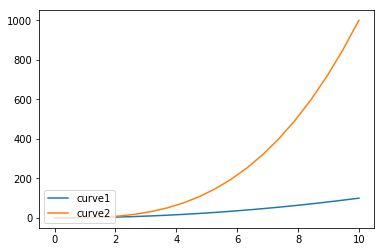

In [32]:
fig, ax = plt.subplots()
ax.plot(x,y,label='curve1')
ax.plot(x,z,label='curve2')
ax.legend(loc=3)

Matplotlib already decided that the best location was upper left, but here we changed it just to visualize the `loc` argument.

### Text in figures

Figures above are functional, but they can certainly be improved. In Matplotlib it is possible to include Latex formatted text. To accomplish this, we just need to use raw strings, i.e., to add a `r` before the Latex commands.

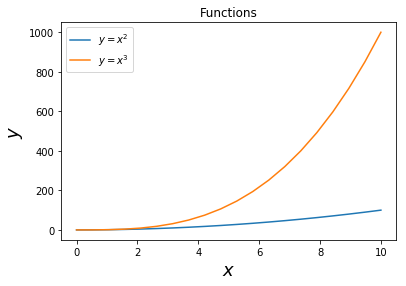

In [35]:
fig, ax = plt.subplots()

ax.plot(x, y, label=r'$y = x^2$')
ax.plot(x, z, label=r'$y = x^3$')
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('Functions');

### Line and marker styles

To change the width of lines we use the `linewidth` or `lw` keyword argument. To change the style we use `linestyle` or `ls`. Markers are added with `marker`. Some markers options are `+`, `-`, `o`, `*`, `s`, `,`, `.`, etc. Check the following code to see how to use these arguments and how do they look:

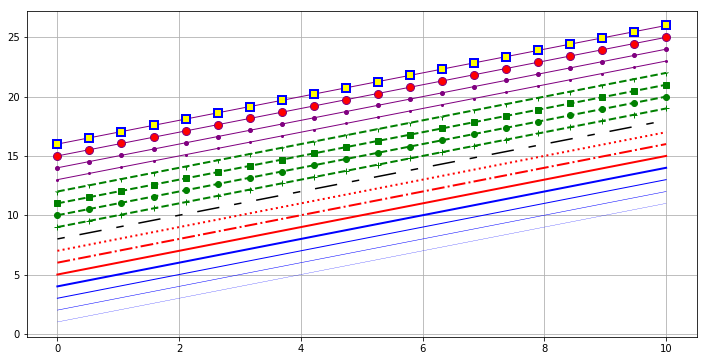

In [37]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, markerfacecolor="yellow", 
        markeredgewidth=2, markeredgecolor="blue");
ax.grid()

### Twin axes

When we want to plot dual axes in a figure, it is useful to check the `twinx` and `twiny` functions. Let's say we want to plot the area and the volume of `x`:

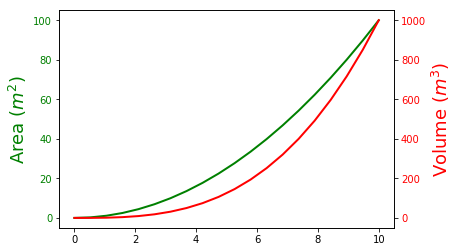

In [38]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color='g')
ax1.set_ylabel(r"Area $(m^2)$", fontsize=18, color='g')
for label in ax1.get_yticklabels():
    label.set_color('g')
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color='r')
ax2.set_ylabel(r"Volume $(m^3)$", fontsize=18, color='r')
for label in ax2.get_yticklabels():
    label.set_color('r')

### More plot styles

There are many plot styles available in [Matplotlib plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). Here we will quickly check only some of them:

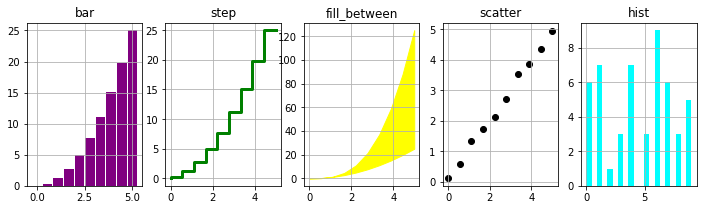

In [62]:
data = np.linspace(0,5,10)
data2 = np.random.randint(0,10,50)

fig, axes = plt.subplots(1, 5, figsize=(12,3)) #We can omit the nrows and ncols and assign it directly

axes[0].bar(data, data**2, color='purple', width=0.5)
axes[0].set_title('bar')
axes[0].grid()

axes[1].step(data, data**2, lw=3, color='green')
axes[1].set_title('step')
axes[1].grid()

axes[2].fill_between(data, data**2, data**3, color='yellow');
axes[2].set_title('fill_between');
axes[2].grid()

axes[3].scatter(data, data + 0.15*np.random.randn(len(data)), color='black')
axes[3].set_title('scatter')
axes[3].grid()

axes[4].hist(data2, bins=20, color='cyan')
axes[4].set_title('hist')
axes[4].grid()

## Seaborn basics

The documentation is available at [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html).

### Importing Seaborn

In [ ]:
import seaborn as sns

#### Lineplot

https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot

=> More examples are further down the page

Pandas will automatically create a `Figure` and `Axes` if none is provided.

Data is normally provided as a Pandas `DataFrame` through the `data=` argument.

Many of the seaborn functions return the `Axes` object for further manipulation.

**Plot data (without times)**

(200.0, 1500.0)

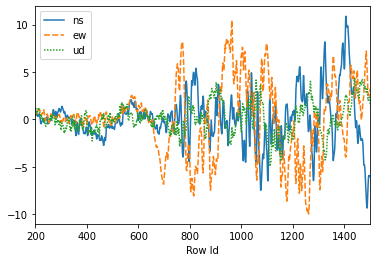

In [30]:
ax = sns.lineplot(data=station_data[['ns', 'ew', 'ud']])
label_artist = ax.set_xlabel('Row Id')

ax.set_xlim([200, 1500]) # Only show values from x = 200 to 1500

**Plot data (with x-Axis = times)**

In [31]:
# We have to change the format for the lineplot function: x, y, hue
# x = times
# y = value
# hue = motion (this separates "ns", "ew", "ud")

# melt() picks one or multiple columns as identifiers and the other
# columns will store measured variables.
melted_station_data = station_data.melt(
    id_vars='times', # identifier
    var_name='motion' # measured variable
)
melted_station_data

,times,motion,value
0,0.00,ns,0.046748
1,0.02,ns,0.097089
2,0.04,ns,0.154333
3,0.06,ns,0.166724
4,0.08,ns,0.171430
...,...,...,...
7495,49.90,ud,0.028026
7496,49.92,ud,0.027743
7497,49.94,ud,0.027661
7498,49.96,ud,0.027845


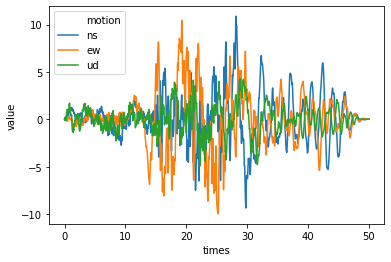

In [32]:
# Now we can feed the data to lineplot and tell it what x, y and hue (color) are
ax = sns.lineplot(
    data=melted_station_data,
    x='times', # x-axis
    y='value', # y-axis
    hue='motion', # colors
)

#### Scatter plot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

=> More examples are further down the page

In this example we are only interested in a time frame of 0 to 40.

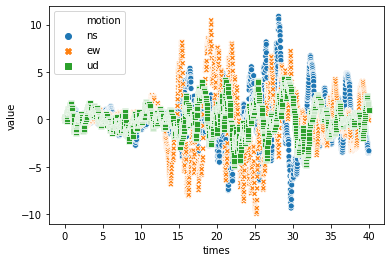

In [33]:
msd_lt40 = melted_station_data.loc[melted_station_data['times'] < 40]
ax = sns.scatterplot(
    data=msd_lt40,
    x='times', # x-axis
    y='value', # y-axis
    hue='motion', # colors
    style='motion', # markers (optional)
)

And here we are only plottig the up-down motion in the 0 to 40 time frame.

We also color the points based on the 

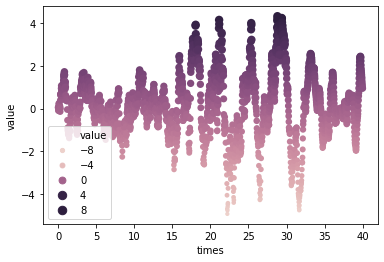

In [34]:
msd_lt40_ud = msd_lt40.loc[msd_lt40['motion'] == 'ud']
ax = sns.scatterplot(
    data=msd_lt40_ud,
    x='times', # x-axis
    y='value', # y-axis
    hue='value', # colors
    size='value', # size (This way you could also add a third dimension)
    linewidth=0, # Remove the white border around the dots
)

#### Histogram

https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot

Note: Seaborn will automatically select a number of `bins`. You can also manually set them with `bins=`.

In [35]:
np.random.seed(0) # This will guarantee the same random results

# Random data
x = np.random.normal(size=100)
x2 = np.random.normal(size=100) - 3

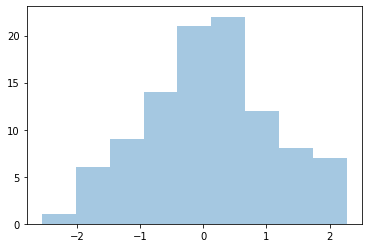

In [36]:
ax = sns.distplot(
    x,
    kde=False # This is too complex for this lecture
)

**Plotting two or more datasets on a single Axes**

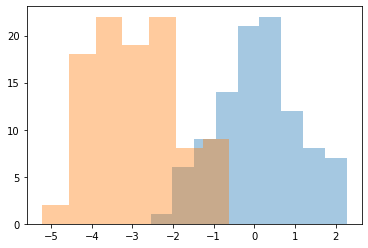

In [37]:
ax = sns.distplot(x, kde=False)
sns.distplot(x2, kde=False, ax=ax);

#### Plotting on subplots

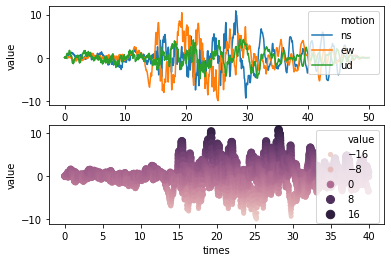

In [38]:
fig, axes = plt.subplots(2, 1)
ax1 = sns.lineplot(
    ax=axes[0], # Specify the axes
    data=melted_station_data,
    x='times', # x-axis
    y='value', # y-axis
    hue='motion', # colors
)
ax2 = sns.scatterplot(
    ax=axes[1], # Specify the axes
    data=msd_lt40,
    x='times', # x-axis
    y='value', # y-axis
    hue='value', # colors
    size='value', # size (This way you could also add a third dimension)
    linewidth=0, # Remove the white border around the dots
)

# Summary

* You learned the basics of **`Matplotlib`**
    - How to **import** it
    - How to add **Axes**
    - **Subplots**
    - Figure **size**, **DPI** and **aspect ratio**
    - You know how to **show** and **save** a figure
    - You know how to add **legends**
    - You can add **text** in a figure
    - You learned to customize **lines**
    - You can create **twin axes**
    - You learned different **plot types**

* You know the basics of **`Seaborn`**
    - Data handling
    - Plot types
        - Lineplot
        - Scatterplot
        - Histogram
    - Combining Matplotlib and Seaborn plots
    - Customization
